**Лабораторная работа №5 “Метод опорных векторов”**

Долатович Алина, 858461

Набор данных ex5data1.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит три переменные X1 и X2 (независимые переменные) и y (метка класса). Данные являются линейно разделимыми.

Набор данных ex5data2.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит три переменные X1 и X2 (независимые переменные) и y (метка класса). Данные являются нелинейно разделимыми.

Набор данных ex5data3.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит три переменные X1 и X2 (независимые переменные) и y (метка класса). Данные разделены на две выборки: обучающая выборка (X, y), по которой определяются параметры модели; валидационная выборка (Xval, yval), на которой настраивается коэффициент регуляризации и параметры Гауссового ядра.

Набор данных spamTrain.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит две переменные X - вектор, кодирующий отсутствие (0) или присутствие (1) слова из словаря vocab.txt в письме, и y - метка класса: 0 - не спам, 1 - спам. Набор используется для обучения классификатора.

Набор данных spamTest.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит две переменные Xtest - вектор, кодирующий отсутствие (0) или присутствие (1) слова из словаря vocab.txt в письме, и ytest - метка класса: 0 - не спам, 1 - спам. Набор используется для проверки качества классификатора.


In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as pyplot
from sklearn import svm
import numpy as np
import re
from nltk.stem import PorterStemmer
import pandas
import os

Загрузите данные ex5data1.mat из файла.



In [2]:
data = loadmat('ex5data1.mat')

x = data['X']
y = data['y']

print(x.shape)
print(y.shape)

(51, 2)
(51, 1)


Постройте график для загруженного набора данных: по осям - переменные X1, X2, а точки, 
принадлежащие различным классам должны быть обозначены различными маркерами.




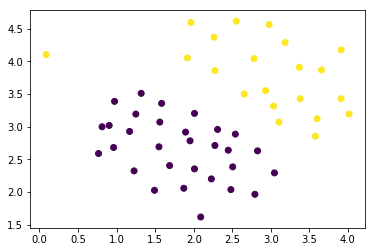

In [3]:
def scatterPlot(x, y):
    pyplot.scatter(x[:, 0], x[:, 1], c=y.squeeze())
        
scatterPlot(x, y)
pyplot.show()

Обучите классификатор с помощью библиотечной реализации SVM с линейным ядром на данном наборе.



In [4]:
def getSVMModel(x, y, c=1, gamma=10, kernel='linear'):
    model = svm.SVC(kernel=kernel, C=c, gamma=gamma) 
    model.fit(x, y.ravel())
    model.score(x, y.ravel())
    return model

svmModel = getSVMModel(x, y)

Постройте разделяющую прямую для классификаторов с различными параметрами C = 1, C = 100 
(совместно с графиком из пункта 2). Объясните различия в полученных прямых?



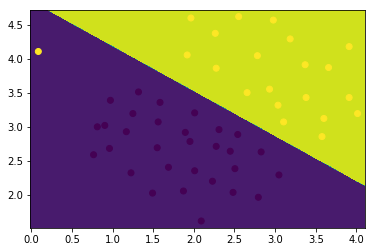

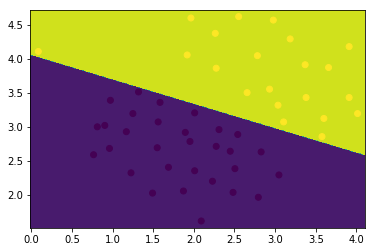

In [5]:
def contourfPlot(x, y, svmModel, step=0.01):
    xMin, xMax = min(x[:, 0]) - 0.1, max(x[:, 0]) + 0.1
    yMin, yMax = min(x[:, 1]) - 0.1, max(x[:, 1]) + 0.1
    xx, yy = np.meshgrid(np.arange(xMin, xMax, step), np.arange(yMin, yMax, step))

    Z = svmModel.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    pyplot.contourf(xx, yy, Z)
    
def plotData(x, y, cs, kernel, gamma=10):
    for c in cs:
        svmModel = getSVMModel(x, y, c, gamma=gamma, kernel=kernel)
        contourfPlot(x, y, svmModel)
        scatterPlot(x, y)
        pyplot.show()
        
cs = [1, 100]
plotData(x, y, cs, 'linear')

Реализуйте функцию вычисления Гауссового ядра для алгоритма SVM.



In [6]:
#k(x1,x2) = exp(-q * ||x1-x2||^2), q>0 \\ q=1/(2*sigm^2)

def gausKernel(x, gamma=0.5): #q>0
    x0, x1 = x[:, 0], x[:, 1]
    return np.exp(-gamma * max(x0 - x1) ** 2)

gausKernel(x)

0.70966828666490156

Загрузите данные ex5data2.mat из файла.



In [7]:
data2 = loadmat('ex5data2.mat')

y = data2['y']
x = data2['X']

print(x.shape, y.shape)

((863, 2), (863, 1))


Обработайте данные с помощью функции Гауссового ядра.



In [8]:
width = gausKernel(x)
print(width)

0.844384016754


Обучите классификатор SVM.



In [9]:
svmModel = getSVMModel(x, y, gamma=width, kernel='rbf')
print(svmModel)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.84438401675358987,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


Визуализируйте данные вместе с разделяющей кривой (аналогично пункту 4).
 

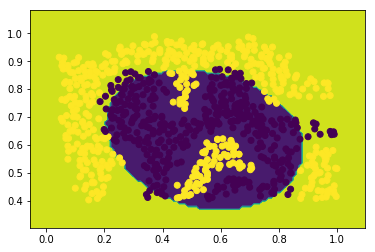

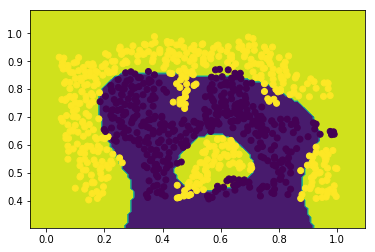

In [10]:
cs = [10, 100000]
plotData(x, y, cs, 'rbf', gamma=width)

Загрузите данные ex5data3.mat из файла.



In [11]:
data3 = loadmat('ex5data3.mat')

yVal = data3['yval']
xVal = data3['Xval']

y = data3['y']
x = data3['X']

print(xVal.shape, yVal.shape, x.shape, y.shape)

((200, 2), (200, 1), (211, 2), (211, 1))


Вычислите параметры классификатора SVM на обучающей выборке, а также подберите параметры C и σ2 
на валидационной выборке.



In [12]:
width = gausKernel(x)

model = getSVMModel(x, y, c=10000, gamma=width, kernel='rbf')
model.score(xVal, yVal)
params = model.get_params()
print(params)

predicted = model.predict(xVal)

errorCount = 0
for p, val in zip(predicted, yVal.squeeze()):
    if p != val:
        errorCount += 1
        
print(float(errorCount)/len(predicted))


{'kernel': 'rbf', 'C': 10000, 'verbose': False, 'probability': False, 'degree': 3, 'shrinking': True, 'max_iter': -1, 'decision_function_shape': 'ovr', 'random_state': None, 'tol': 0.001, 'cache_size': 200, 'coef0': 0.0, 'gamma': 0.77298573383986124, 'class_weight': None}
0.065


Визуализируйте данные вместе с разделяющей кривой (аналогично пункту 4).



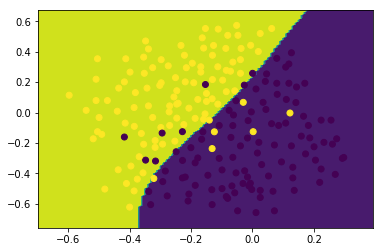

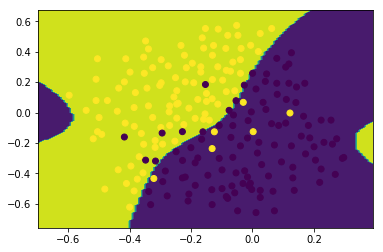

In [13]:
cs = [100, 10000]
plotData(x, y, cs, 'rbf', gamma=width)


Загрузите данные spamTrain.mat из файла.



In [14]:
data4 = loadmat('spamTrain.mat')

trainX = data4['X']
trainY = data4['y']

print(trainX, trainY.shape)

(array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), (4000, 1))


Обучите классификатор SVM.



In [15]:
model = getSVMModel(trainX, trainY, c=100, gamma=1, kernel='rbf')
print(model)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Загрузите данные spamTest.mat из файла.



In [16]:
data5 = loadmat('spamTest.mat')

xTest = data5['Xtest']
yTest = data5['ytest']

print(xTest.shape, yTest.shape)

((1000, 1899), (1000, 1))


Подберите параметры C и σ2.



In [17]:
model.score(xTest, yTest)

0.80900000000000005

In [18]:
emailText = open("emailSample1.txt", "r").read()
print(emailText)

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com




Реализуйте функцию предобработки текста письма, включающую в себя:
-перевод в нижний регистр;
-удаление HTML тэгов;
-замена URL на одно слово (например, “httpaddr”);
-замена email-адресов на одно слово (например, “emailaddr”);
-замена чисел на одно слово (например, “number”);
-замена знаков доллара ($) на слово “dollar”;
-замена форм слов на исходное слово (например, слова “discount”, “discounts”, “discounted”,  “discounting” должны быть заменены на слово “discount”). Такой подход называется stemming;
-остальные символы должны быть удалены и заменены на пробелы, т.е. в результате получится текст, состоящий из слов, 
 разделенных пробелами.



In [19]:
def processText(text):
    text = text.lower()
    
    htmlReg = r'<.*?>'
    text = re.sub(htmlReg, '', text)
    
    urlReg = r'[a-z]*[:.]+\S+'
    text = re.sub(urlReg, ' httpaddr ', text)
    
    emailReg = r'[\w\.-]+@[\w\.-]+'
    text = re.sub(emailReg, ' emailaddr ', text)
    
    numberReg = r'\d+'
    text = re.sub(numberReg, ' number ', text)
    
    text = text.replace('$', ' dollar ')
    
#     ps = PorterStemmer() 
#     wordList = text.split(' ')
#     wordList = [ps.stem(w) for w in wordList]
#     text = ' '.join(wordList)

    symbolsReg = r'[?_()^@$%&*±>\/=<\t!@,.~\'|&\":;\\\n#$-]'
    text = re.sub(symbolsReg, '', text)
    return text

text = processText(emailText)
print(text)

 anyone knows how much it costs to host a web portal well it depends on how many visitors youre expectingthis can be anywhere from less than  number  bucks a month to a couple of  dollar  number  you should checkout  httpaddr  or perhaps amazon ec number  if youre running something  httpaddr to unsubscribe yourself from this mailing list send an email togroupnameunsubscribe httpaddr 


Загрузите коды слов из словаря vocab.txt.

In [20]:
vocab = pandas.read_csv('vocab.txt', sep = "\t", header=None)
print(vocab.shape)

(1899, 2)


Реализуйте функцию замены слов в тексте письма после предобработки на их соответствующие коды.



In [21]:
def replaceWordToCode(text, vocab):
    wordsData = vocab[1]
    codesData = vocab[0]

    words = text.split(' ')
    codes = []
    for word in words:
        index = wordsData[wordsData == word].index.tolist()
        if index:
            code = codesData[index].values[0]
            codes.append(code)
    return codes
    
codes = replaceWordToCode(text, vocab)
print(codes)

[794, 1077, 883, 1699, 790, 1822, 1831, 883, 1171, 794, 238, 162, 688, 945, 1663, 1120, 1062, 1699, 1162, 477, 1120, 1893, 1510, 799, 1182, 512, 1120, 810, 799, 1699, 1896, 688, 961, 1477, 71, 530, 799]


Реализуйте функцию преобразования текста письма в вектор признаков (в таком же формате как в файлах 
spamTrain.mat и spamTest.mat).



In [22]:
def conversion(codes, vocab):
    signs = np.zeros((len(vocab), len(codes)))
    for codeIndex in range(len(codes)):
        index = codes[codeIndex]
        signs[index-1, codeIndex] = 1
    return signs.T

conversionX = conversion(codes, vocab)
print(conversionX.shape)

(37, 1899)


Проверьте работу классификатора на письмах из файлов emailSample1.txt, emailSample2.txt, spamSample1.txt 
и spamSample2.txt.



In [23]:
def checkPredictedValue(vocab):
    mails = ['emailSample1.txt', 'emailSample2.txt', 'spamSample1.txt', 'spamSample2.txt']
    for mail in mails:
        emailText = open(mail, "r").read()
        text = processText(emailText)
        codes = replaceWordToCode(text, vocab)
        conversionX = conversion(codes, vocab)
#         print(conversionX)
        predicted = model.predict(conversionX)
        print(predicted)
        
checkPredictedValue(vocab)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 0]


Создайте свой набор данных из оригинального корпуса текстов - http://spamassassin.apache.org/old/publiccorpus/.



In [24]:
def generateDict():
    paths = ['hard_ham/', 'spam/']
    keys = [0, 1]
    count = 0
    
    returnedText = ''
    dictValue = dict()
    for key, path in zip(keys, paths):
        fullText = ''
        for filename in os.listdir(path):
            fullText += open(path + filename, "r").read()

        fullText = processText(fullText)
        returnedText += fullText
        setWord = set(fullText.split(' '))
        for word in setWord:
            dictValue[count] = [count+1, word, key]
            count += 1
            
    return dictValue, returnedText

values, text = generateDict()
print(values)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


Постройте собственный словарь.

In [25]:
fullDict = pandas.DataFrame.from_dict(values, orient='index')
newVocab = fullDict.loc[:, fullDict.columns.isin([0, 1])]
newY = np.array(fullDict.loc[:, fullDict.columns.isin([2])])
xxx = list(fullDict.loc[:, fullDict.columns.isin([0])].values.squeeze())
newX = conversion(xxx, newVocab)

In [ ]:
# codes = replaceWordToCode(text, newVocab)

In [ ]:
model = getSVMModel(newX, newY, c=100, gamma=1, kernel='rbf')
checkPredictedValue(newVocab)

** Вывод **

Метод опорных векторов — набор схожих алгоритмов обучения с учителем, использующихся для задач классификации и регрессионного анализа. Принадлежит семейству линейных классификаторов. Особым свойством метода опорных векторов является непрерывное уменьшение эмпирической ошибки классификации и увеличение зазора, поэтому метод также известен как метод классификатора с максимальным зазором.

Основная идея метода — перевод исходных векторов в пространство более высокой размерности и поиск разделяющей гиперплоскости с максимальным зазором в этом пространстве. Две параллельных гиперплоскости строятся по обеим сторонам гиперплоскости, разделяющей классы. Разделяющей гиперплоскостью будет гиперплоскость, максимизирующая расстояние до двух параллельных гиперплоскостей. Алгоритм работает в предположении, что чем больше разница или расстояние между этими параллельными гиперплоскостями, тем меньше будет средняя ошибка классификатора.